<a href="https://colab.research.google.com/github/abakamousa/churn_detection/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn detection**

### Install missing librairies








In [1]:
!pip install opendatasets
!pip install pipreqs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=456a8ad6d7800dff28ef69a8b9064d0c73eb8673dd9955d3160b6a864d512c4d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


# Import librairies

In [105]:
import pandas            as pd
import numpy             as np
import opendatasets      as od
import seaborn           as sns
import matplotlib.pyplot as plt
import plotly.express    as px

from sklearn.preprocessing     import RobustScaler
from sklearn.ensemble          import RandomForestClassifier
from sklearn.model_selection   import GridSearchCV, train_test_split
from sklearn.linear_model      import LogisticRegression
from sklearn                   import metrics
from sklearn.metrics           import classification_report

### generate requirements file

In [3]:
pip freeze > requirements.txt


# Load dataset from kaggle

In [4]:
url="https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c54/data"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abakamousa
Your Kaggle Key: ··········


100%|██████████| 18.8M/18.8M [00:00<00:00, 47.6MB/s]



Extracting archive ./telecom-churn-case-study-hackathon-c54/telecom-churn-case-study-hackathon-c54.zip to ./telecom-churn-case-study-hackathon-c54


# Exploratory data analaysis

In [5]:
df      = pd.read_csv("/content/telecom-churn-case-study-hackathon-c54/train.csv")
df_dict = pd.read_csv("/content/telecom-churn-case-study-hackathon-c54/data_dictionary.csv")

In [6]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [7]:

df.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


In [8]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [9]:
print("Number of features: ", df.shape[1])
print("Number of rows or observations: ", df.shape[0])

Number of features:  172
Number of rows or observations:  69999


In [10]:
print("List of Features: \n", df.columns.tolist())


List of Features: 
 ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', '

In [55]:
df['last_date_of_month_6'].unique()

array(['6/30/2014'], dtype=object)

In [57]:
df['last_date_of_month_7'].unique()

array(['7/31/2014', -99], dtype=object)

In [56]:
df['last_date_of_month_8'].unique()

array(['8/31/2014', -99], dtype=object)

**Remark:** We will not use features **last_date_of_month_6**, **last_date_of_month_7** and **last_date_of_month_8** since they each consist of a single value

In [11]:
print("Number of missing values: ", df.isnull().sum().sum())

Number of missing values:  1835086


In [12]:
def plot_missingVal(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.title("Percentage of missing values per feature")
        plt.ylabel("Percentage (%)")
        plt.xlabel("Features")
        plt.show()
    else:
        print('No NAs found')

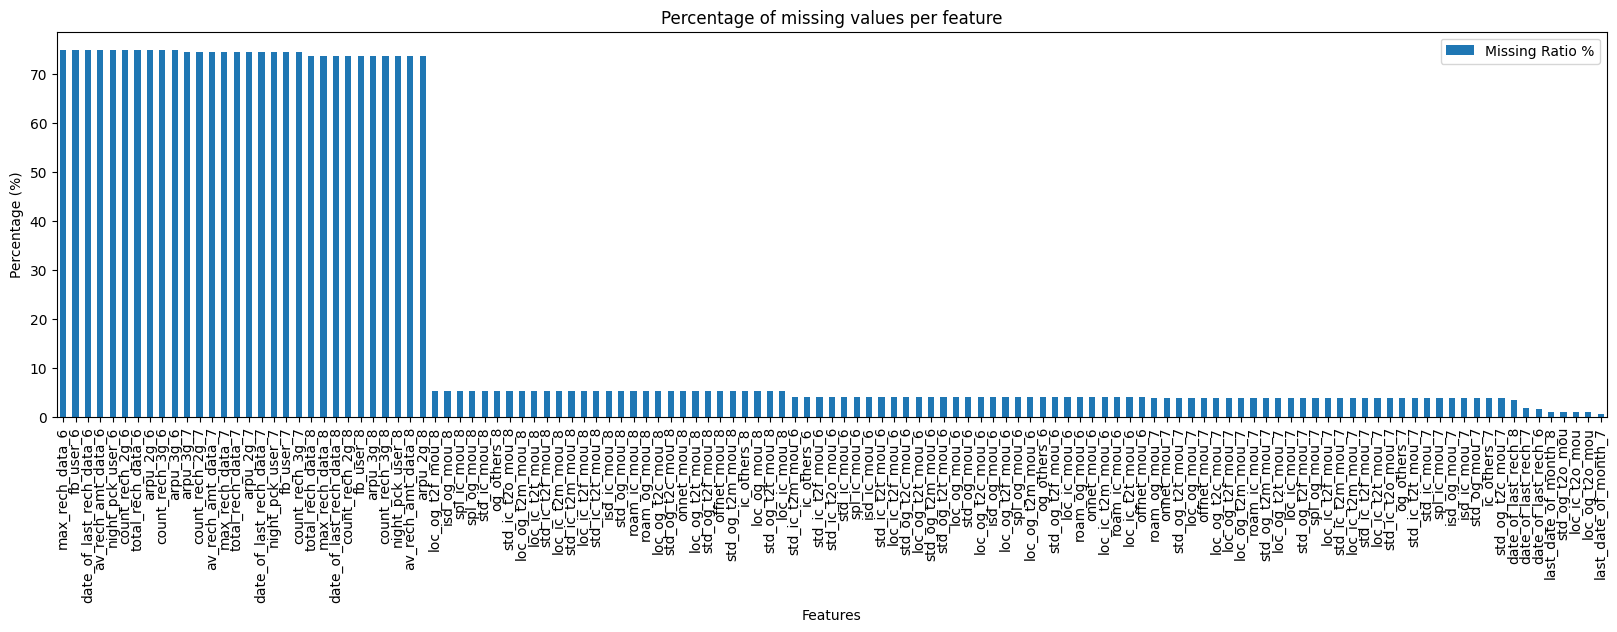

In [13]:
plot_width, plot_height = (20,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plot_missingVal(df)

**Remark:** we can obrserve that many features in our dataset contains missing values.

In [14]:
print("Description of the various acronyms in train data")
df_dict

Description of the various acronyms in train data


,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [15]:
def target_analysis(df):
  val = df.value_counts()
  churn = val.index
  count = val.values
  plt.figure(figsize=(4,4))
  plt.pie(count, labels=churn, autopct='%1.0f%%')
  plt.legend(loc='lower left', title="churn_probability")
  plt.title("Target analysis")
  plt.show()

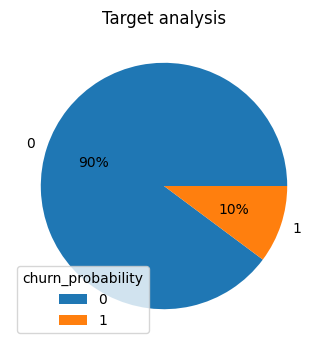

In [16]:
target_analysis(df['churn_probability'])

**Remark:** we can observe that our dataset is imbalanced. We need to perform resampling in order to handle that.

### **Distribution analysis**

In [17]:
#df['circle_id'].unique()


array([109])

In [ ]:
df.groupby(['circle_id'], as_index=False).agg(mean_churn=("churn_probability","mean"))

,circle_id,mean_churn
0,109,0.101887


**Remark:**
- we can see that there is only few proportion of churn in the Telecom circle area to which the customer belongs to
- circle_id feature has only one value
- we will not use **circle_id** feature in machine learning model

In [33]:
df.drop(['circle_id'], axis=1, inplace=True)

In [ ]:
df.groupby(['aon'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="aon", ascending=True)

,aon,mean_churn
0,180,0.229167
1,181,0.155738
2,182,0.238095
3,183,0.162162
4,184,0.231707
...,...,...
3450,4282,0.000000
3451,4299,0.000000
3452,4319,0.000000
3453,4321,0.000000


**Remark:** we can observe the customer with low aon (age on network) are more likely to churn

In [ ]:
df.groupby(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="mean_churn", ascending=False)

,monthly_2g_6,monthly_2g_7,monthly_2g_8,mean_churn
50,3,1,0,1.000000
59,4,0,0,1.000000
34,2,0,0,0.222222
18,1,0,0,0.136208
36,2,0,2,0.125000
...,...,...,...,...
30,1,3,0,0.000000
31,1,3,1,0.000000
33,1,3,3,0.000000
35,2,0,1,0.000000


In [ ]:
df.groupby(['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="mean_churn", ascending=False)

,monthly_3g_6,monthly_3g_7,monthly_3g_8,mean_churn
148,4,3,1,1.0
177,6,2,0,1.0
163,5,0,0,1.0
166,5,2,2,1.0
165,5,2,1,0.5
...,...,...,...,...
81,2,1,6,0.0
86,2,2,4,0.0
87,2,2,5,0.0
89,2,3,1,0.0


**Remark:** Service schemes with validity equivalent to a month have an impact on the churn

In [ ]:
df.groupby(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="mean_churn", ascending=False)

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,mean_churn
1669,2,9,0,0,0,0,1.0
3244,12,0,0,0,0,0,1.0
2707,7,7,0,1,1,0,1.0
1632,2,7,0,0,2,0,1.0
105,0,0,0,3,3,0,1.0
...,...,...,...,...,...,...,...
1234,1,6,8,0,0,0,0.0
1235,1,6,9,0,0,0,0.0
1236,1,6,9,1,3,2,0.0
1237,1,6,10,0,0,0,0.0


**Remark:** Service schemes with validity smaller than a month have an impact on the churn

### Boxplot

<Axes: >

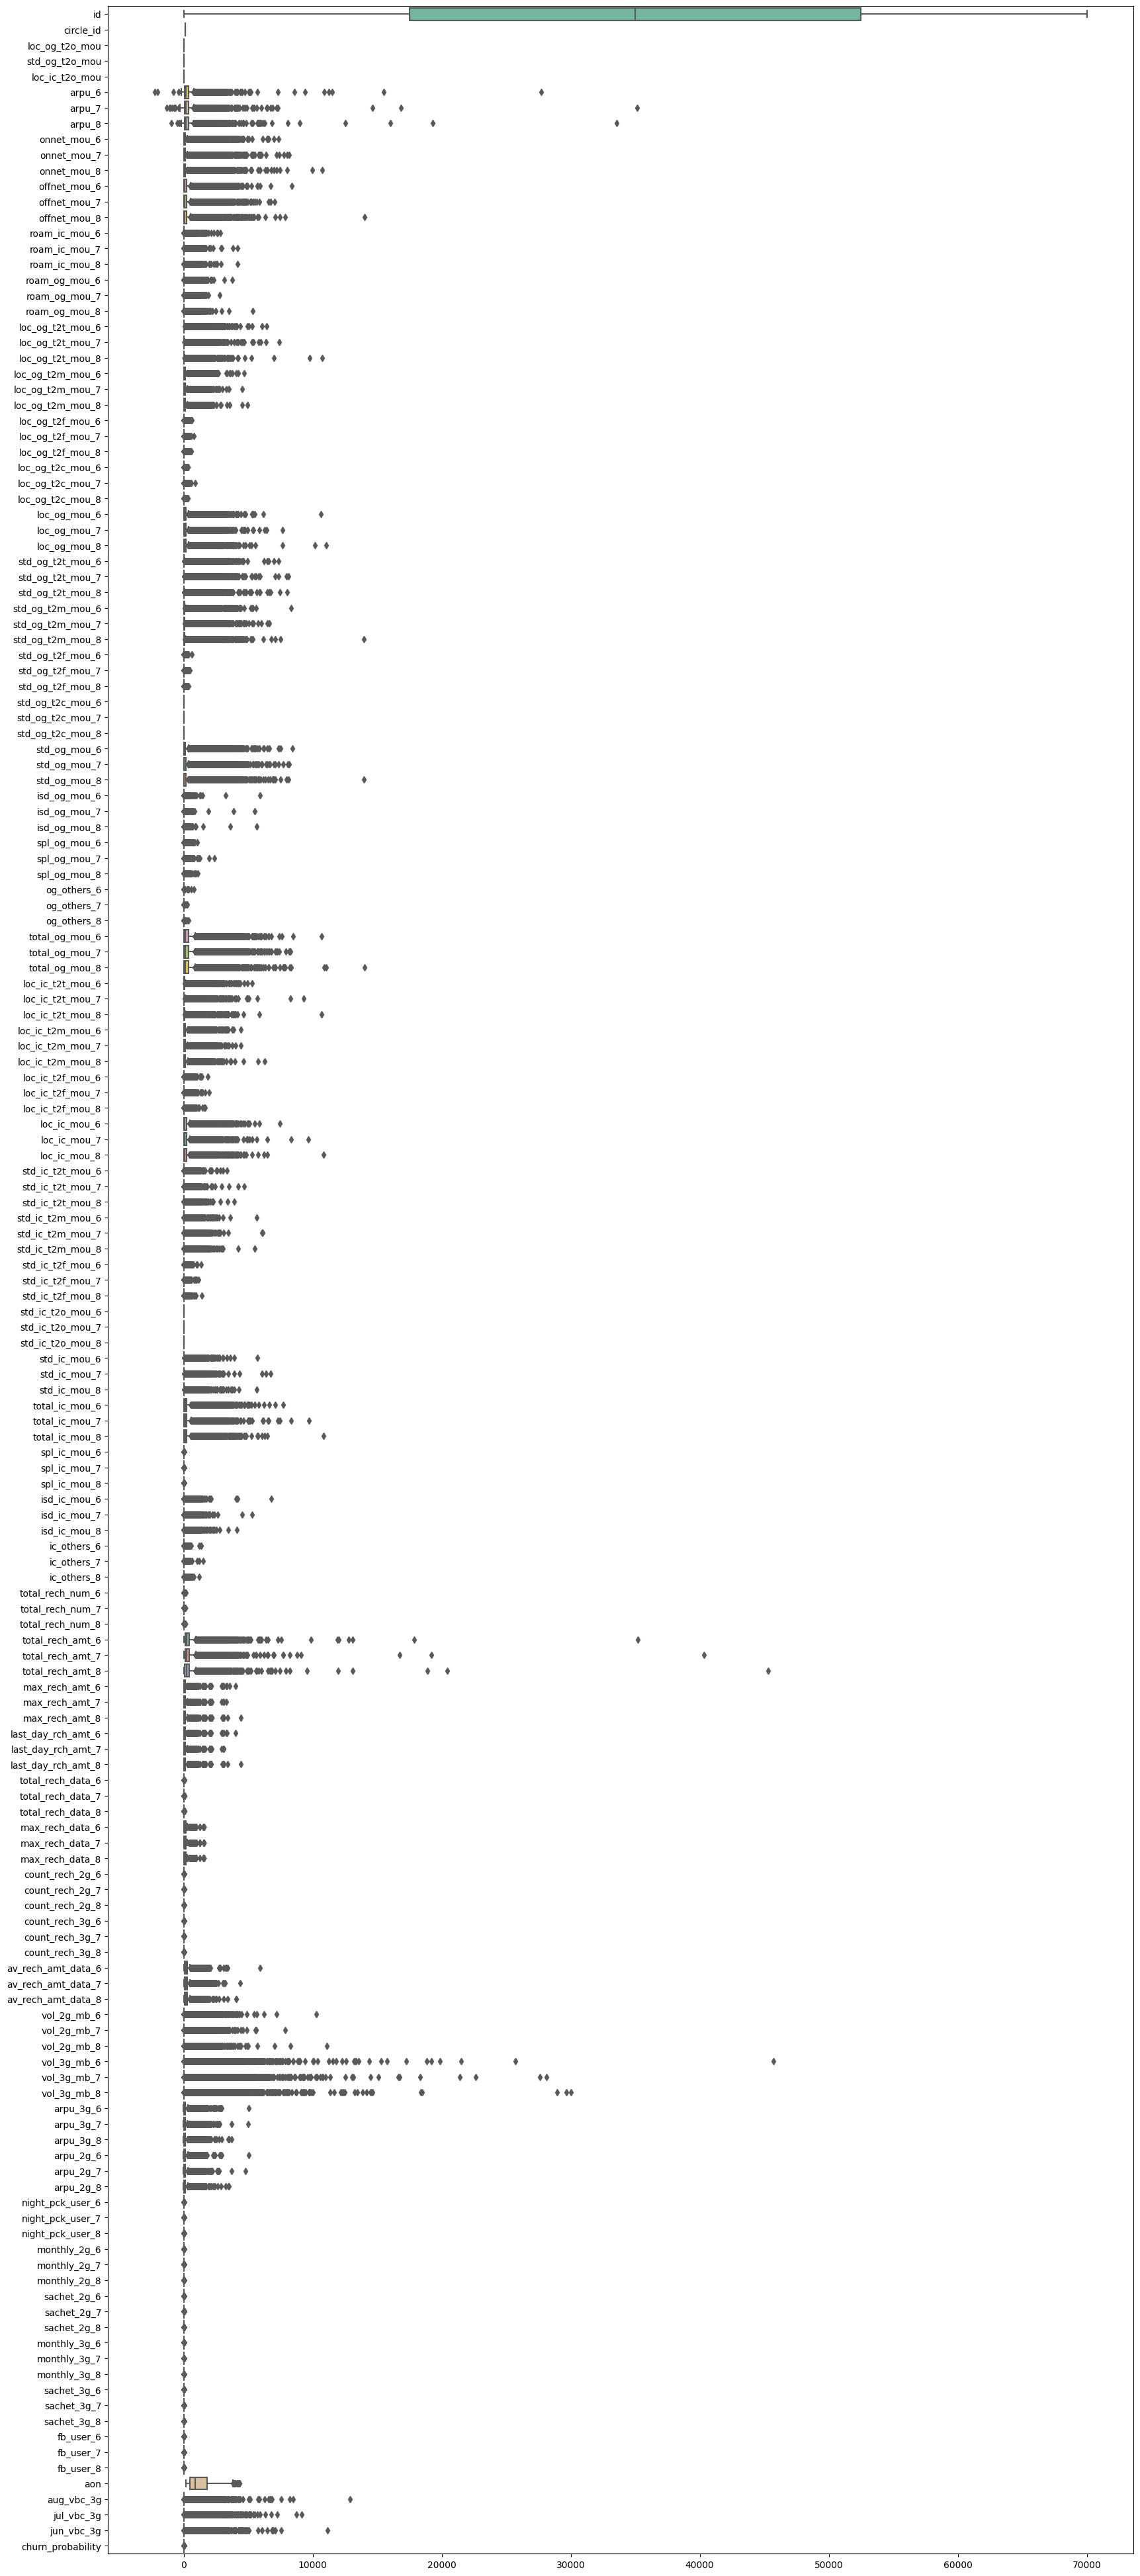

In [ ]:
plot_width, plot_height = (20,50)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
sns.boxplot(data=df, orient="h", palette="Set2")

**Remark:** we can observe that feature such as arpu has a lot of outliers.

## **Data preprocessing**

### Data cleaning

In [27]:
#Handling missing values
def impute_missing (data):
  for feature in data.select_dtypes(include='number'):
    data[feature].fillna(data[feature].mean(), inplace=True)
  for feature in data.select_dtypes(exclude='number'):
    data[feature].fillna(-99, inplace=True)
  print("Number of missing values after the imputation: ", data.isnull().sum().sum())
  return data


In [28]:
df = impute_missing (df)

Number of missing values after the imputation:  0


In [32]:
#Handling duplicate observations
nb_duplicate = df.duplicated().sum()
if nb_duplicate > 0 :
  df.apply(lambda x: x.drop_duplicates()).reset_index(drop=True)
else:
  print("There is no duplicated observation" )

There is no duplicated observation


### Data transformation

In [50]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include='number')),
                   columns=df.select_dtypes(include='number').columns)

### Features selection

In [51]:
#we will drop id feature
df_scaled.drop(['id'], axis=1, inplace=True)

In [52]:
df_scaled

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,-0.599571,-0.375299,-0.646249,0.086735,0.700362,-0.282602,-0.383532,...,0.0,0.0,0.000000,0.000000,0.000000,0.810409,0.00,0.00,0.00,0.0
1,0.0,0.0,0.0,-0.712399,-0.246903,-0.522301,-0.301615,-0.281835,-0.292871,-0.556252,...,0.0,0.0,0.000000,0.090456,0.000000,-0.117472,0.00,0.00,0.00,0.0
2,0.0,0.0,0.0,-0.493049,-0.317281,-0.672584,-0.297378,-0.156040,-0.292871,-0.267010,...,0.0,0.0,0.000000,0.000000,0.000000,0.010409,0.00,0.00,0.00,0.0
3,0.0,0.0,0.0,-0.148342,0.049064,-0.283887,-0.243578,-0.155408,-0.292871,-0.187882,...,0.0,0.0,0.000000,0.000000,0.000000,0.084758,0.00,0.00,0.00,0.0
4,0.0,0.0,0.0,0.155925,-0.227510,-0.317231,-0.131502,-0.243694,-0.244073,-0.250938,...,1.0,0.0,0.083675,0.090456,0.109681,-0.164312,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.0,0.0,0.0,-0.655546,0.787122,0.478990,-0.301615,-0.223715,-0.205862,-0.556252,...,1.0,0.0,0.000000,0.090456,0.109681,-0.481041,0.00,0.00,0.00,0.0
69995,0.0,0.0,0.0,-0.134919,0.350042,0.257293,0.630010,1.269560,1.559009,-0.290903,...,0.0,0.0,0.000000,0.000000,0.000000,-0.115985,0.00,0.00,0.00,0.0
69996,0.0,0.0,0.0,0.629862,0.239672,0.306311,0.314965,0.258618,0.331560,1.241348,...,0.0,0.0,0.000000,0.000000,0.000000,0.008178,0.00,0.00,0.00,0.0
69997,0.0,0.0,0.0,0.148231,0.193163,-0.165044,-0.189619,-0.221504,-0.239456,-0.393710,...,0.0,0.0,0.083675,0.090456,0.109681,-0.439405,664.25,1402.96,990.97,0.0


In [63]:
# correlation matrix
corr_matrix = df_scaled.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Suppression des features
df_scaled.drop(to_drop, axis=1, inplace=True)


<ipython-input-63-456859dcddfd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [66]:
print("Number of features : ", df_scaled.shape[1])

Number of features :  158


In [71]:
X = df_scaled.drop('churn_probability', axis=1)
y = df_scaled['churn_probability']


In [74]:
clf = RandomForestClassifier(n_estimators=157, random_state=42)
clf.fit(X, y)

RandomForestClassifier(n_estimators=157, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

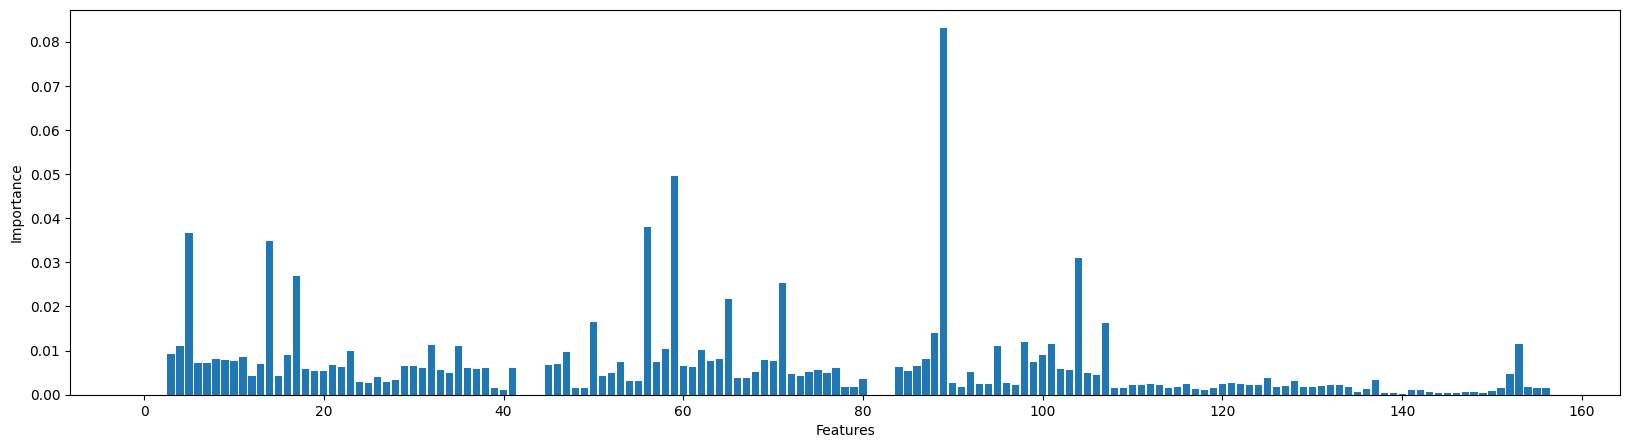

In [75]:
plt.bar(range(X.shape[1]), clf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show



In [78]:
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


In [81]:
feature_importance_df

,Feature,Importance
0,loc_og_t2o_mou,0.000000
1,std_og_t2o_mou,0.000000
2,loc_ic_t2o_mou,0.000000
3,arpu_6,0.009315
4,arpu_7,0.011094
...,...,...
152,fb_user_8,0.004693
153,aon,0.011503
154,aug_vbc_3g,0.001672
155,jul_vbc_3g,0.001537


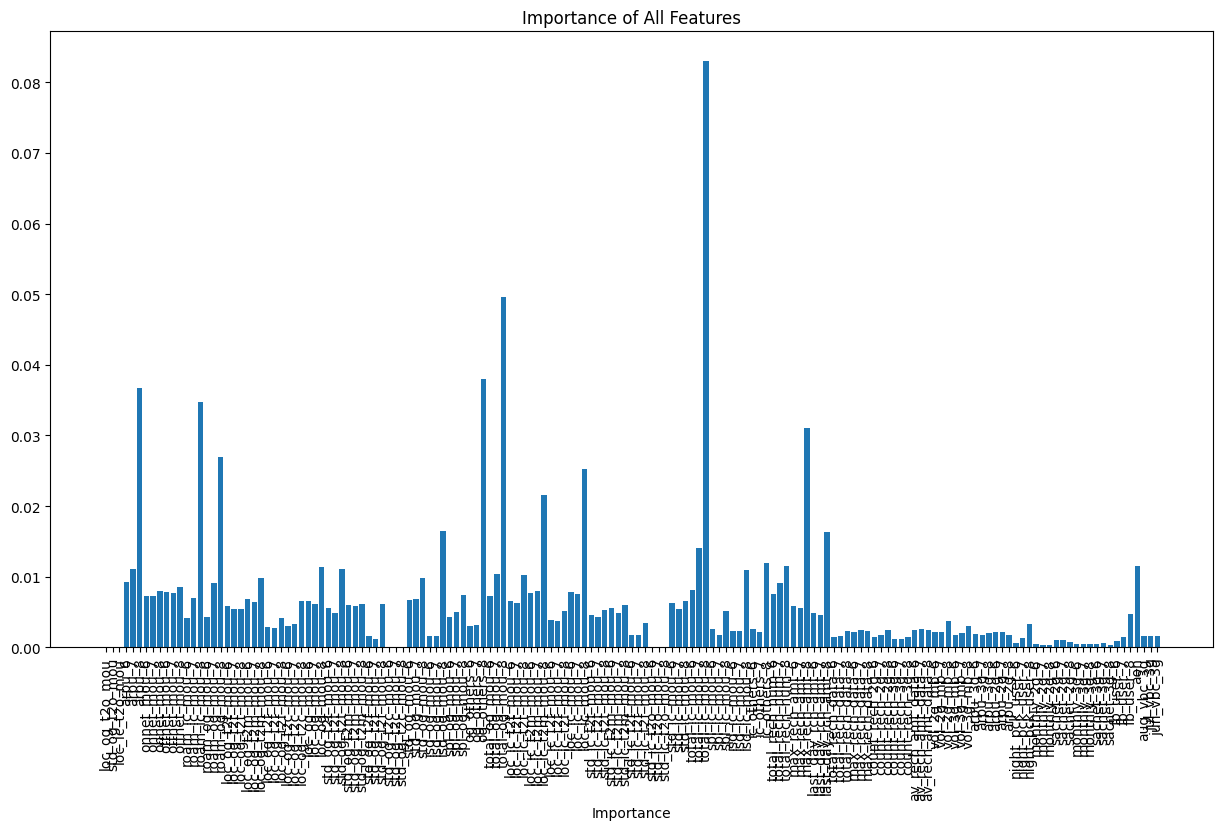

In [83]:
# Plot the importance of all features
plt.figure(figsize=(15, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Importance of All Features')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [88]:
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = top_10_features.head(10)

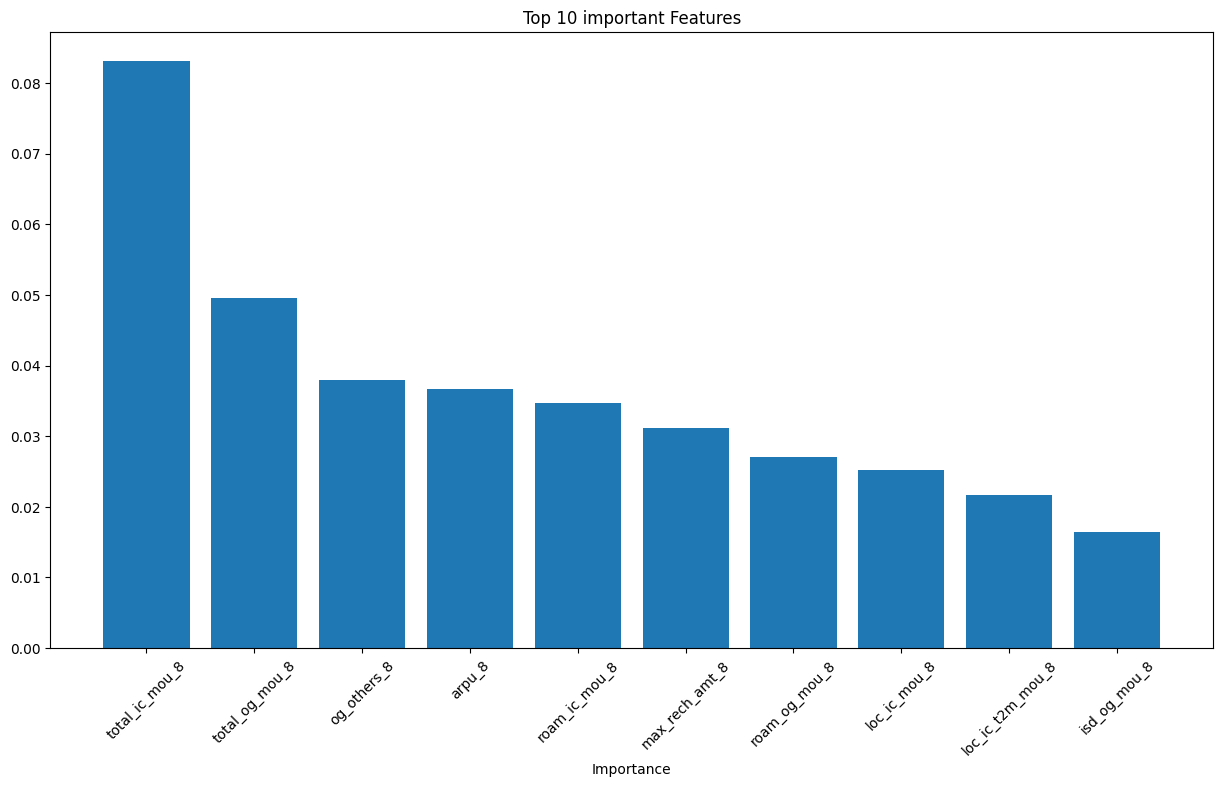

In [87]:
# Plot the importance of all features
plt.figure(figsize=(15, 8))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 important Features')
plt.tick_params(axis='x', rotation=45)
plt.show()

## Train test split

In [97]:
feats  = df_scaled[top_10_features['Feature']]
target = df_scaled.churn_probability
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25)

## **Model training**

In [101]:
logreg = LogisticRegression(random_state=12)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 445.55555555555554, 'Predicted label')

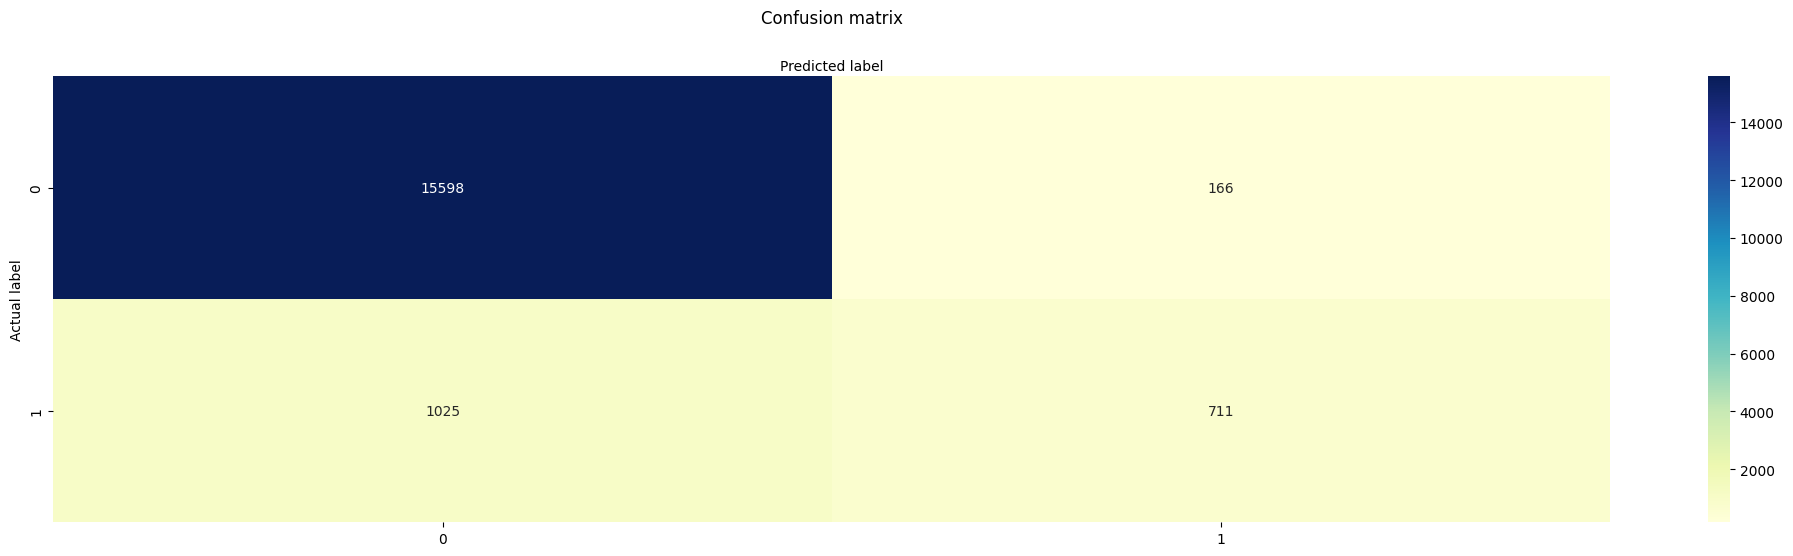

In [104]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [108]:
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no churn       0.94      0.99      0.96     15764
       churn       0.81      0.41      0.54      1736

    accuracy                           0.93     17500
   macro avg       0.87      0.70      0.75     17500
weighted avg       0.93      0.93      0.92     17500

